In [1]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import re

In [2]:
row_X = pd.read_csv('.\\articles_us.csv', encoding='utf-8', sep=',')
row_y = pd.read_csv('.\\label_us.csv', encoding='utf-8', sep=',')

In [3]:
tokenizer = Tokenizer(num_words=5000, oov_token='<unk>')

In [4]:
titles = list(row_X.title)
tokenizer.fit_on_texts(titles)

In [5]:
X = tokenizer.texts_to_sequences(row_X.title)
X = pad_sequences(X, maxlen=50, padding='post')

In [6]:
y = row_y.updown
y = to_categorical(y)

In [7]:
model = Sequential([
    layers.Embedding(5001, 64),
    layers.LSTM(64, activation='tanh'),
    layers.Dense(2, activation='softmax')
])

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model_us.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).repeat(10).shuffle(10).batch(10)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).repeat(10).shuffle(10).batch(10)

In [13]:
hist = model.fit(train_dataset, epochs=30, callbacks=[es, mc], validation_data=val_dataset)

Train for 5538 steps, validate for 616 steps
Epoch 1/30
5536/5538 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.9158
Epoch 00001: val_accuracy improved from -inf to 0.91396, saving model to best_model_us.h5
5538/5538 [==============================] - 49s 9ms/step - loss: 0.2893 - accuracy: 0.9159 - val_loss: 0.2935 - val_accuracy: 0.9140
Epoch 2/30
5533/5538 [============================>.] - ETA: 0s - loss: 0.2717 - accuracy: 0.9159
Epoch 00002: val_accuracy did not improve from 0.91396
5538/5538 [==============================] - 49s 9ms/step - loss: 0.2717 - accuracy: 0.9160 - val_loss: 0.2934 - val_accuracy: 0.9140
Epoch 3/30
5534/5538 [============================>.] - ETA: 0s - loss: 0.2897 - accuracy: 0.9158
Epoch 00003: val_accuracy did not improve from 0.91396
5538/5538 [==============================] - 50s 9ms/step - loss: 0.2896 - accuracy: 0.9159 - val_loss: 0.2935 - val_accuracy: 0.9140
Epoch 4/30
5536/5538 [============================>.] - ETA

In [14]:
from tensorflow.keras.models import load_model

In [15]:
loaded_model = load_model('.\\best_model_us.h5')
print()
print(f'Test Accuracy: {loaded_model.evaluate(X_test, y_test)[1]:.4f}')


1539/1539 [==============================] - 1s 330us/sample - loss: 0.3039 - accuracy: 0.9097
Test Accuracy: 0.9097


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

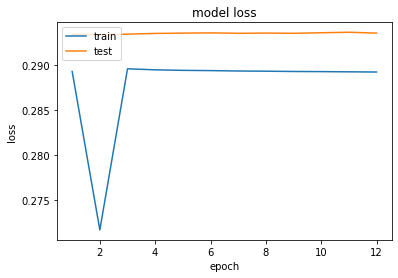

In [17]:
epochs = range(1, len(hist.history['accuracy']) + 1)
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()